In [3]:
import ROOT as r
import copy
import math
import operator
import numpy as np
import matplotlib.pyplot as plt
#import rootpy.plotting.root2matplotlib as rplt

r.gStyle.SetPalette(1)
r.gStyle.SetOptStat(0)

Open ouptut file form Alpaca ODAnalysis histogram

In [4]:
f=r.TFile('/global/u2/p/penning/repo/alpaca/jan20/run/ODAnalysis/ODAnalysisAnalysis.root')
def get_histo(file, histoname):
    histo=file.Get(histoname)
    return copy.deepcopy(histo)

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in r.gDirectory.GetListOfKeys()]

r.TFile.GetKeyNames = GetKeyNames
keyList = f.GetKeyNames('OD')
keyList = f.GetKeyNames('EVT')
print("\nKeys in file:", keyList)
histList=[]
calibList=[]
for elem in keyList: 
    if 'calib' in elem:
        calibList.append(elem)
    else: 
        histList.append(elem)



calib_const={}
def plotList(hcols=3, hlist=histList):
    hlines=int(math.ceil(len(hlist)/hcols))
    c = r.TCanvas("c","c",hcols*500,hlines*500)
    c.Divide(hcols,hlines)
    for i, hname in enumerate(sorted(hlist)): 
        c.cd(i+1)
        stack=r.THStack()
        h=get_histo(f, 'OD/'+hname) 
        stack.Add(h)
        h.SetLineWidth(2)
        c.cd(i+1).SetLogy()
        if 'vs' in hname:
            c.cd(i+1).SetLogx()
            c.cd(i+1).SetLogz()
            h.Draw('colz')
        else:
            h.Draw('histo')
    return c
print(histList)


Keys in file: ['Area_TPC_vs_OD', 'HGPulsePeakAmp', 'HGPulseStartTime_ns', 'HGPulseLength', 'HGPulseArea_vs_index', 'HGPulses_maxCoincidence', 'ch_area_vs_index', 'HGPulseH2W', 'HGPulseArea_vs_h2w', 'HGPulseArea_phd', 'chID_vs_area', 'chID_vs_index', 'HGPulses_nPulses']
['Area_TPC_vs_OD', 'HGPulsePeakAmp', 'HGPulseStartTime_ns', 'HGPulseLength', 'HGPulseArea_vs_index', 'HGPulses_maxCoincidence', 'ch_area_vs_index', 'HGPulseH2W', 'HGPulseArea_vs_h2w', 'HGPulseArea_phd', 'chID_vs_area', 'chID_vs_index', 'HGPulses_nPulses']


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


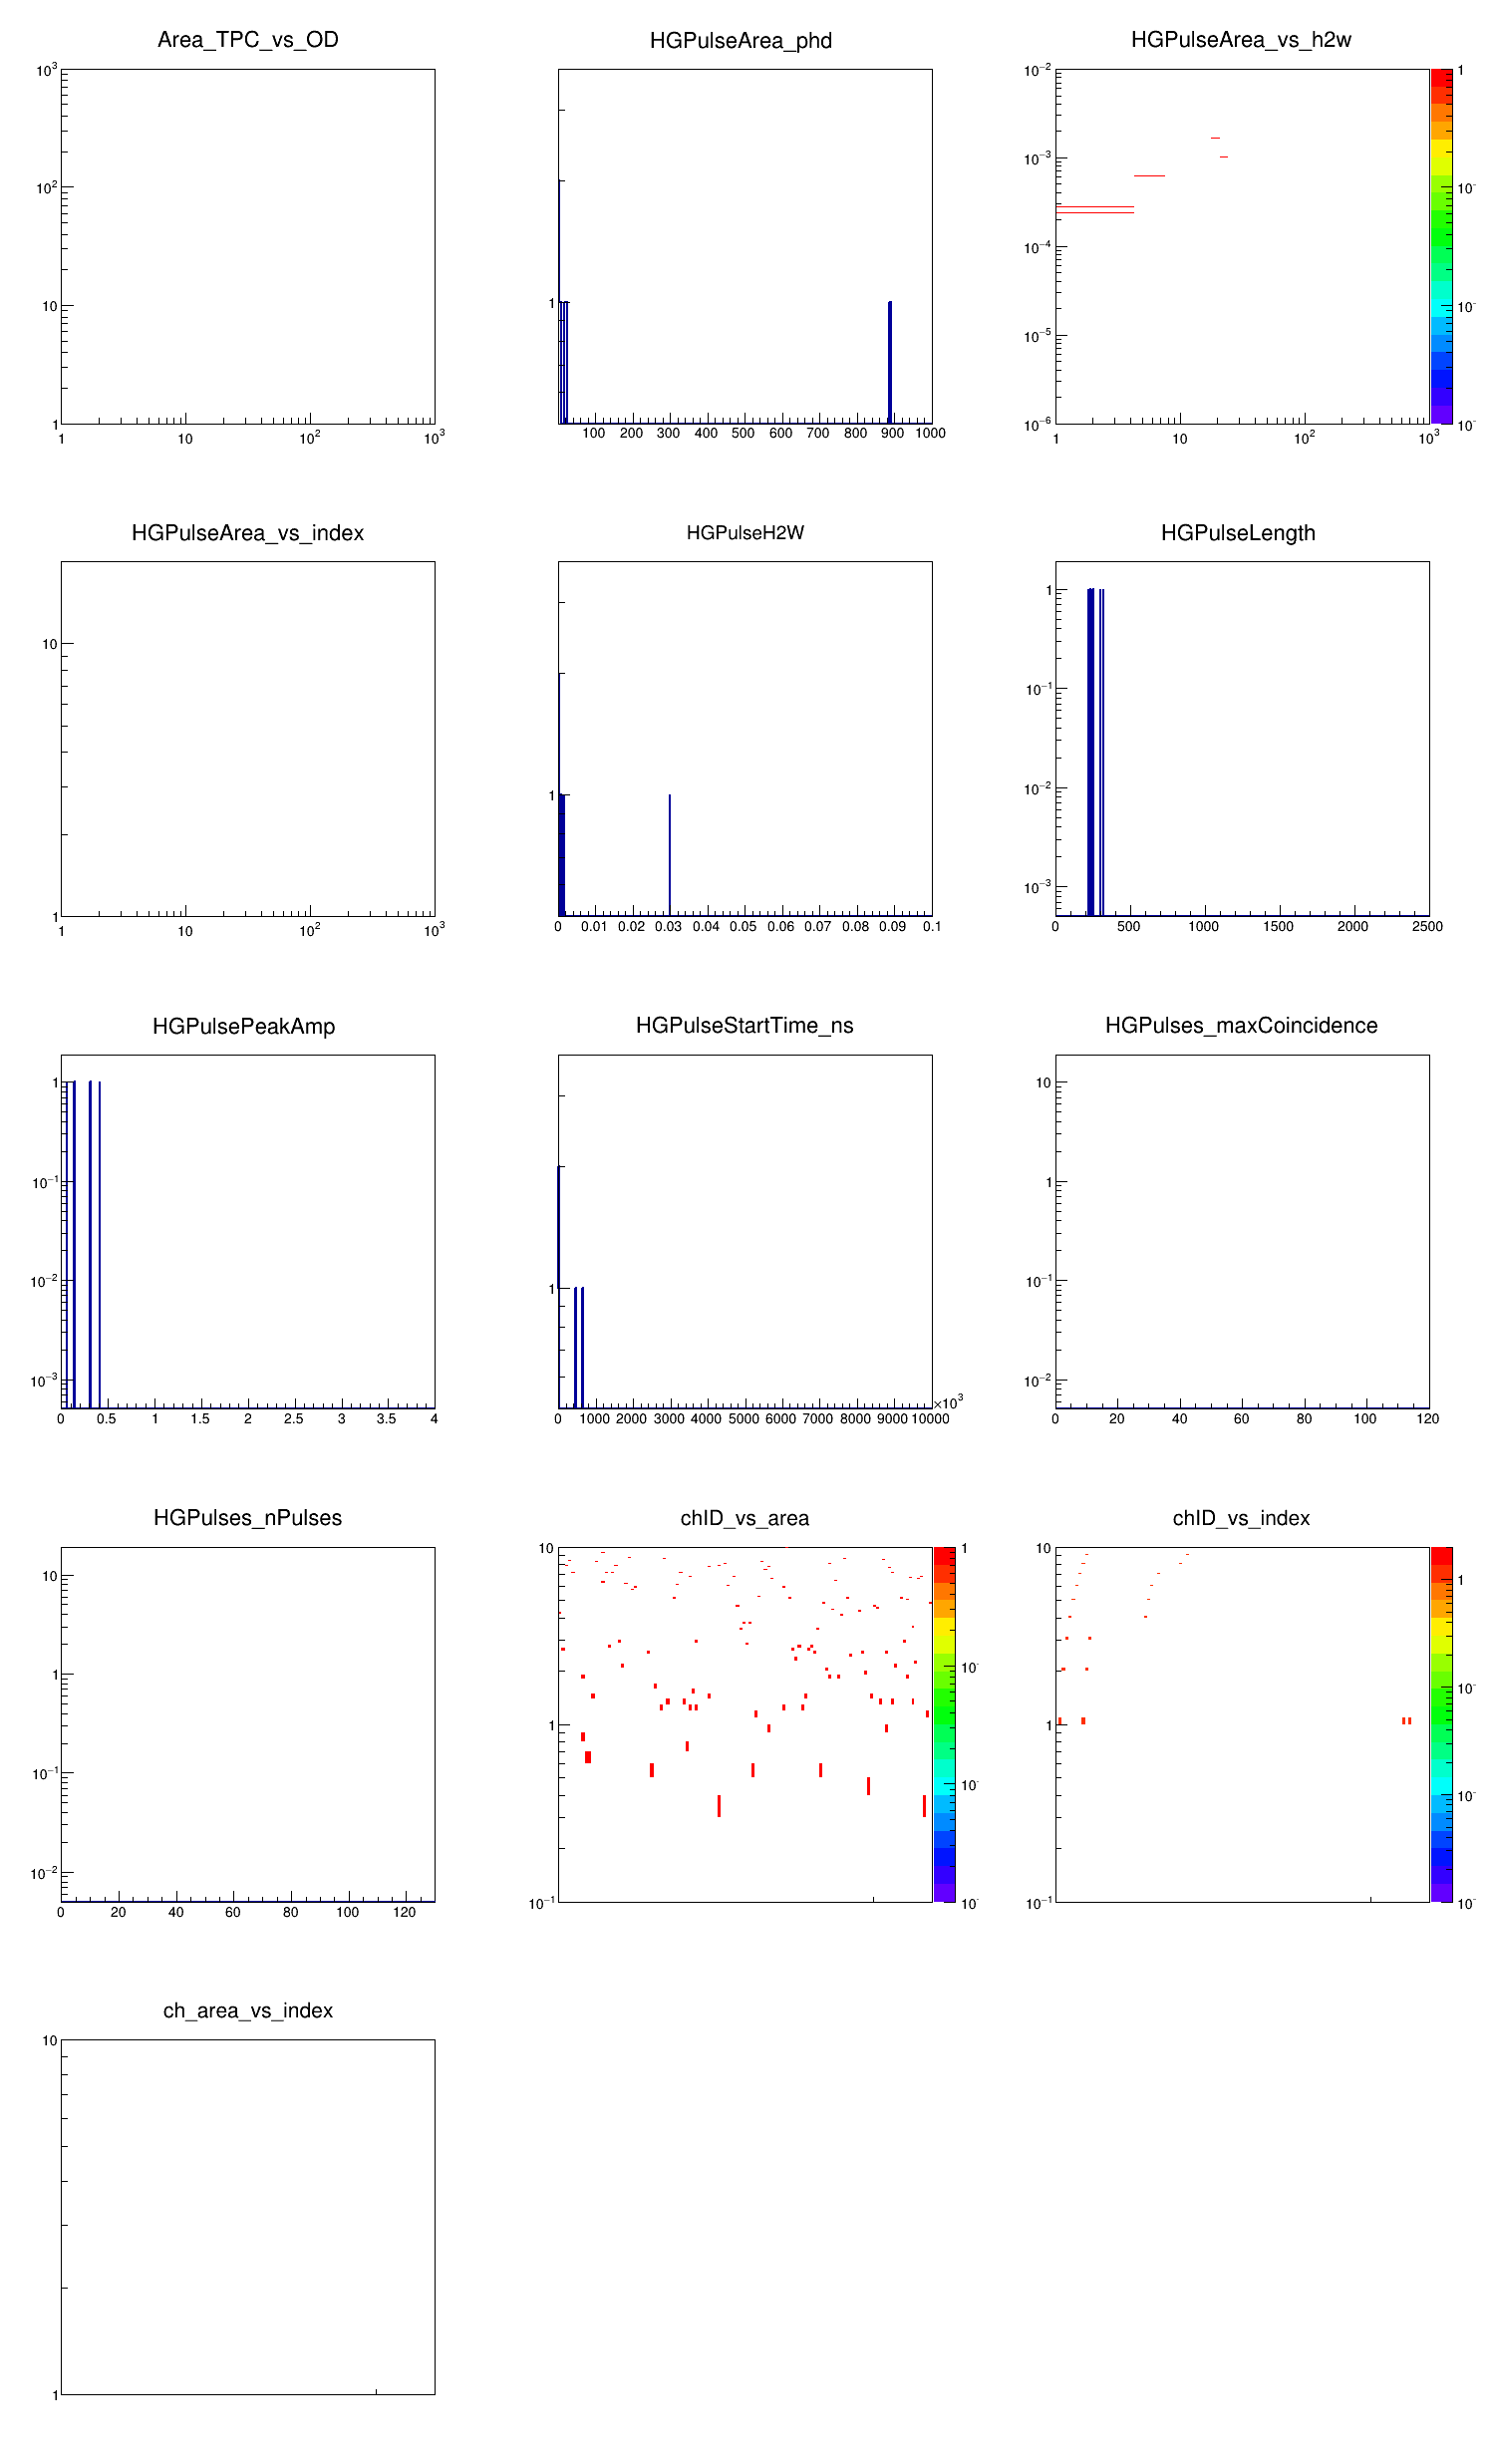

In [6]:
c=plotList(3, histList)
c.Draw()